<a href="https://colab.research.google.com/github/mrMichalR/blueberry_yield/blob/main/blueberry_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset


**Context**

Blueberries are perennial flowering plants with blue or purple berries. They are classified in the section Cyanococcus within the genus Vaccinium. Vaccinium also includes cranberries, bilberries, huckleberries, and Madeira blueberries. Commercial blueberries—both wild (lowbush) and cultivated (highbush)—are all native to North America. The highbush varieties were introduced into Europe during the 1930s.

Blueberries are usually prostrate shrubs that can vary in size from 10 centimeters (4 inches) to 4 meters (13 feet) in height. In the commercial production of blueberries, the species with small, pea-size berries growing on low-level bushes are known as "lowbush blueberries" (synonymous with "wild"), while the species with larger berries growing on taller, cultivated bushes are known as "highbush blueberries". Canada is the leading producer of lowbush blueberries, while the United States produces some 40% of the world s supply of highbush blueberries.

**Content**

"The dataset used for predictive modeling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agroecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches."

**Features Unit Description**

Clonesize m2 The average blueberry clone size in the field
Honeybee bees/m2/min Honeybee density in the field
Bumbles bees/m2/min Bumblebee density in the field
Andrena bees/m2/min Andrena bee density in the field
Osmia bees/m2/min Osmia bee density in the field
MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season
MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature
AverageOfUpperTRange ℃ The average of the upper band daily air temperature
MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature
MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature
AverageOfLowerTRange ℃ The average of the lower band daily air temperature
RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero
AverageRainingDays Day The average of raining days of the entire bloom season

**Acknowledgements**

Qu, Hongchun; Obsie, Efrem; Drummond, Frank (2020), “Data for: Wild blueberry yield prediction using a combination of computer simulation and machine learning algorithms”, Mendeley Data, V1, doi: 10.17632/p5hvjzsvn8.1

Dataset is outsourced from here.

In [1]:
!pip install pandasai
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 15.1 MB/s eta 0:00:00
  Using cached pandas-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
ydata-profiling 4.1.2 requires matplotli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.2 which is incompatible.
pandasai 0.2.11 requires matplotlib<4.0.0,>=3.7.1, but you have matplotlib 3.6.3 which is incompatible.
pandasai

# Libraries

In [2]:
import pandas as pd
from pandasai import PandasAI
import numpy as np
import seaborn as sns
import os, sys
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from pandas import set_option
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

<ipython-input-2-3750e1b79e9f>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Data load

In [26]:
url_train ='https://raw.githubusercontent.com/mrMichalR/blueberry_yield/main/data/train.csv'
url_test = 'https://raw.githubusercontent.com/mrMichalR/blueberry_yield/main/data/test.csv'
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


## Descriptive analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [5]:
df.describe(include='all')

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [6]:
df.nunique()

id                      15289
clonesize                   6
honeybee                    7
bumbles                    11
andrena                    16
osmia                      14
MaxOfUpperTRange            6
MinOfUpperTRange            5
AverageOfUpperTRange        5
MaxOfLowerTRange            6
MinOfLowerTRange            7
AverageOfLowerTRange        5
RainingDays                 6
AverageRainingDays          8
fruitset                 1526
fruitmass                1515
seeds                    2066
yield                     776
dtype: int64

In [7]:
df.isnull().any()

id                      False
clonesize               False
honeybee                False
bumbles                 False
andrena                 False
osmia                   False
MaxOfUpperTRange        False
MinOfUpperTRange        False
AverageOfUpperTRange    False
MaxOfLowerTRange        False
MinOfLowerTRange        False
AverageOfLowerTRange    False
RainingDays             False
AverageRainingDays      False
fruitset                False
fruitmass               False
seeds                   False
yield                   False
dtype: bool

In [16]:
df.duplicated(subset=None, keep=False).any()

False

In [17]:
df.duplicated(subset='yield', keep=False)

0        True
1        True
2        True
3        True
4        True
         ... 
15284    True
15285    True
15286    True
15287    True
15288    True
Length: 15289, dtype: bool

In [24]:
df.groupby(by=["yield"], axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True).sum()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
yield,,,,,,,,,,,,,,,,,
1945.53061,207145,600.0,10.500,7.41,11.660,13.430,2190.7,1324.3,1829.9,1579.0,764.1,1294.8,634.0,10.56,10.274277,10.483232,825.252041
2379.90521,118553,425.0,7.250,4.13,7.900,8.270,1335.7,807.5,1116.2,962.8,465.9,789.3,366.0,6.16,4.996701,6.256378,487.099958
2384.72892,117322,470.0,6.537,4.51,6.789,6.188,1447.5,875.1,1209.4,1043.4,504.9,855.4,406.0,6.81,5.044442,6.189002,491.920755
2452.68075,123714,437.5,6.750,4.26,6.760,7.160,1304.0,788.2,1089.2,939.8,454.8,770.8,405.0,6.71,4.875132,5.982331,460.903342
2508.37567,126875,337.5,5.750,4.14,6.650,8.640,1233.4,745.6,1030.6,889.0,430.2,728.9,429.0,7.13,5.834402,5.977067,472.778478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671.71681,167504,462.5,9.250,8.31,12.080,16.160,2223.3,1344.1,1857.9,1602.6,775.5,1314.1,333.0,6.53,16.281927,13.505731,1165.444154
8711.20896,149941,287.5,5.750,5.92,8.640,11.150,1552.5,938.5,1297.2,1119.0,541.5,917.6,188.0,3.90,11.008985,9.202037,778.798200
8743.52098,209141,387.5,7.750,7.95,11.420,15.170,1997.0,1207.4,1668.8,1439.6,696.6,1180.6,322.0,6.10,14.661856,12.115457,1047.062381


In [12]:
# duplicates = [i for i in df['yield'].duplicated() if (i==True)]

duplicates = df.index[df['yield'].duplicated(subset=df['yield'],keep='first') == True].tolist()
duplicates

TypeError: ignored

In [11]:
len(duplicates)

14513

In [113]:
# calculate duplicates
df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
# print(df[dups])
# print(df[dups].columns)

False


In [112]:
type(df['id'].duplicated())

for elem in df.columns:
  df['elem'].duplicated()
  df['id'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15284    False
15285    False
15286    False
15287    False
15288    False
Name: id, Length: 15289, dtype: bool

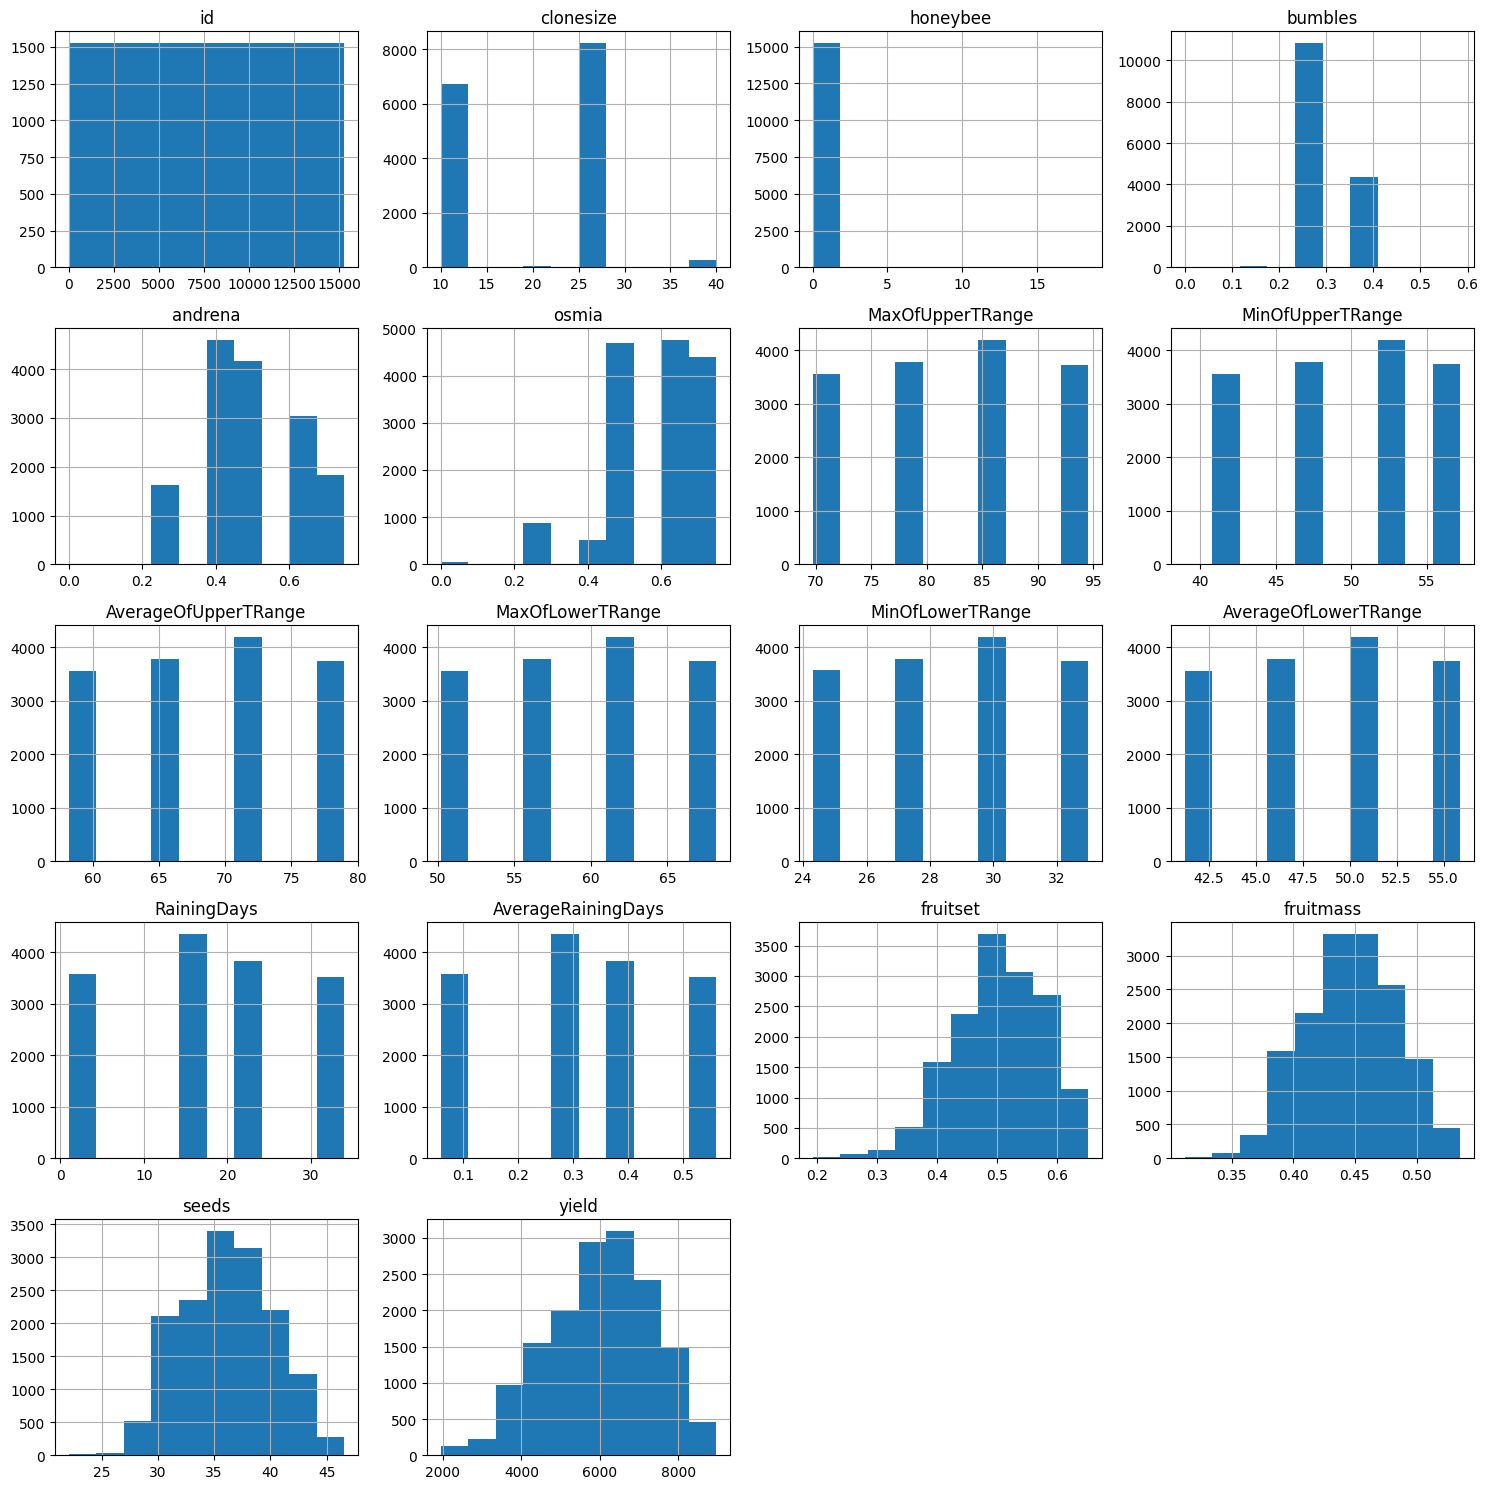

In [8]:
# histograms of each attribute to get a sense of the data distributions
df.hist(figsize=(15,15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

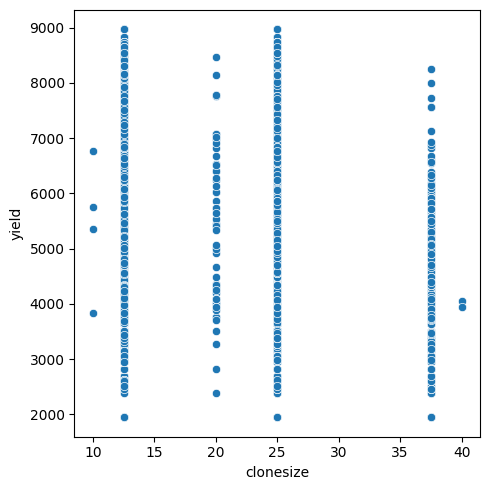

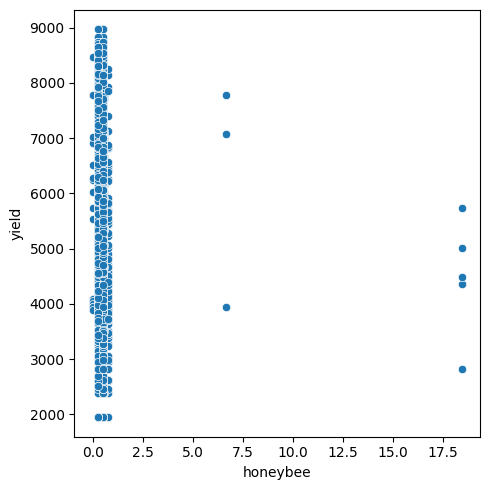

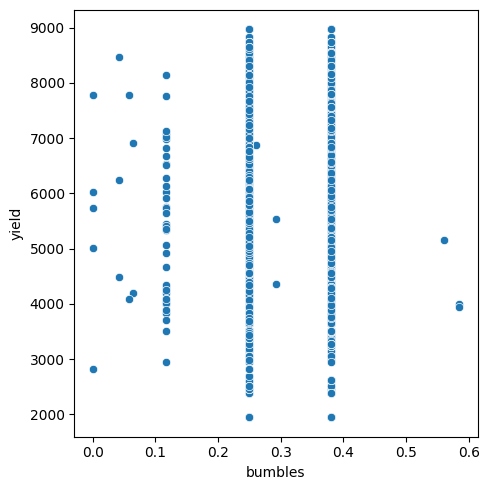

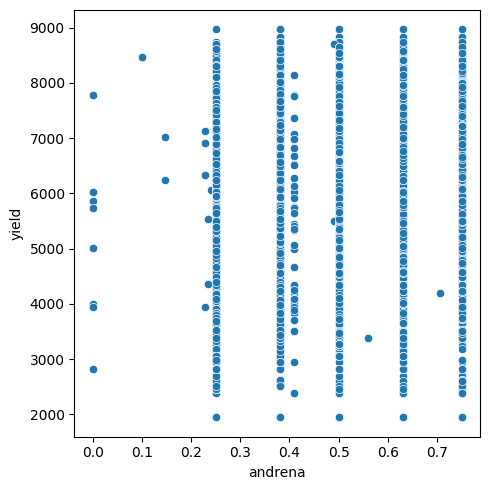

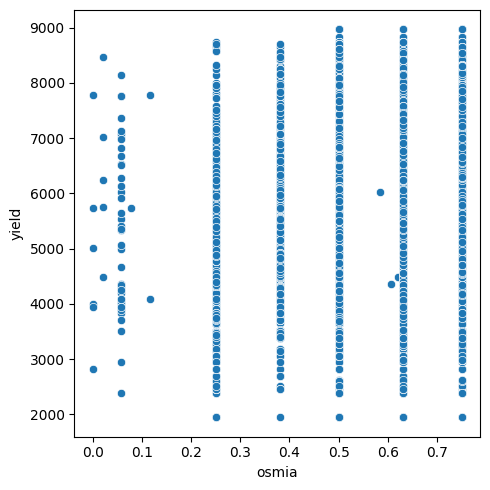

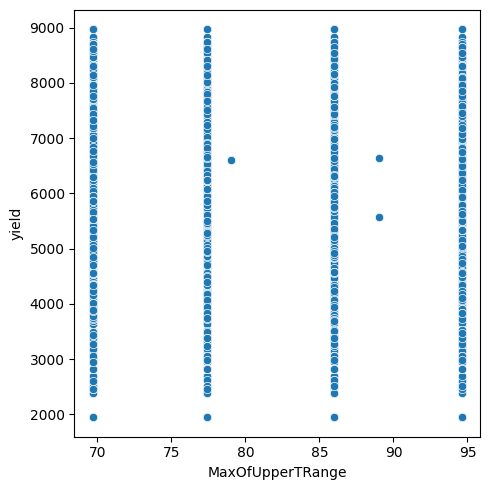

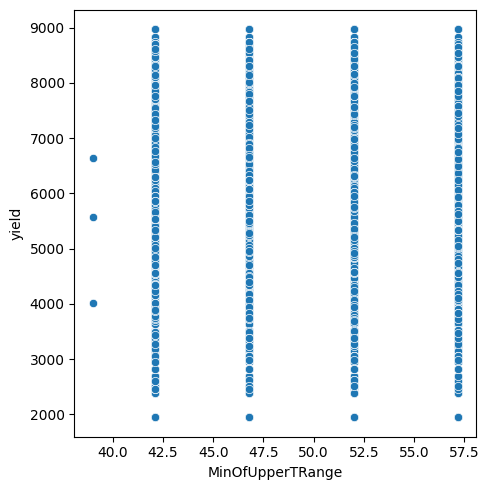

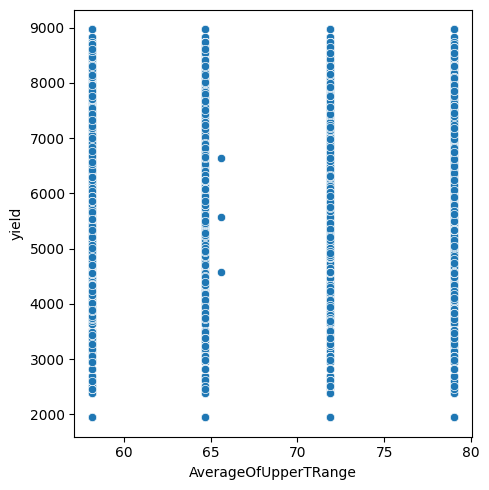

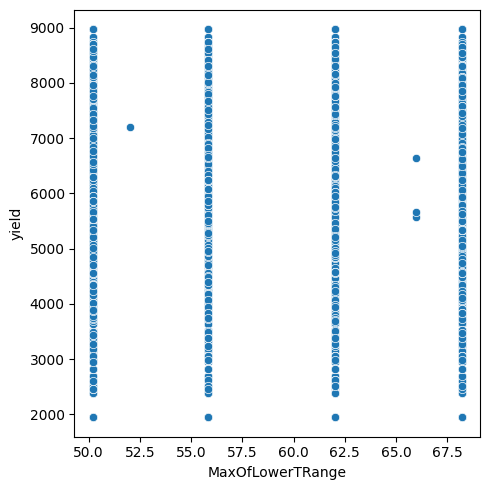

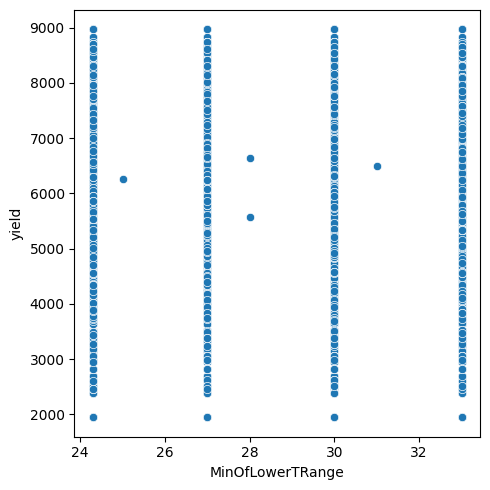

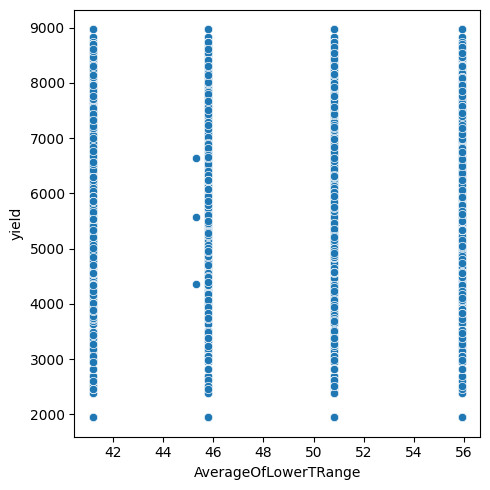

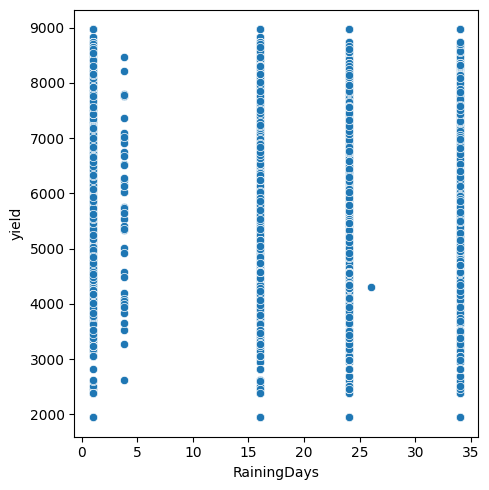

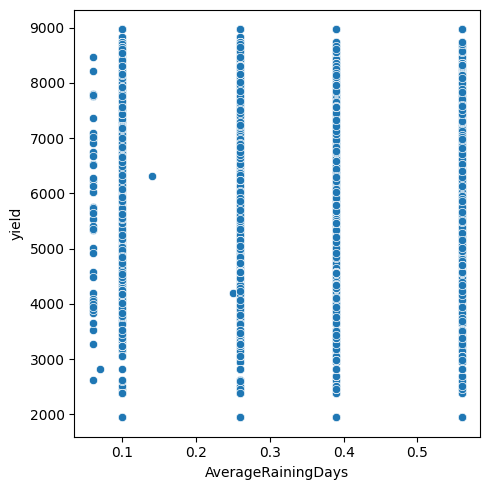

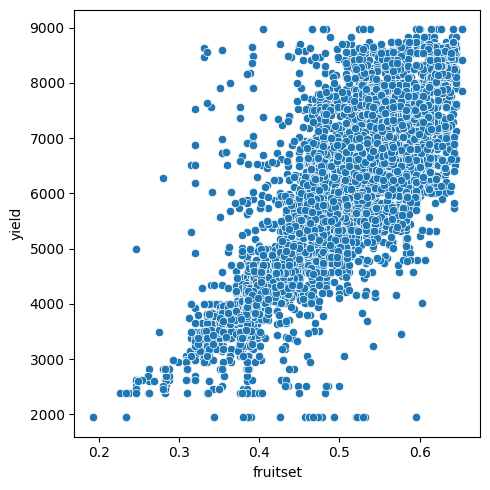

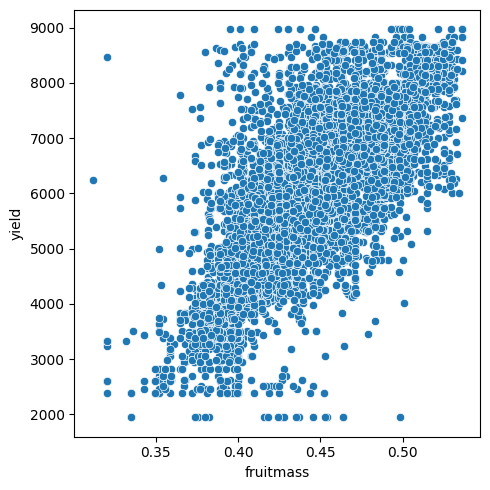

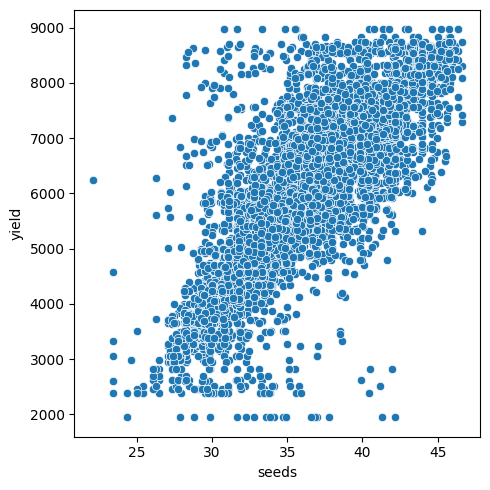

In [58]:
for col in df.columns[1:17]:
  fig, ax = plt.subplots(figsize=(5, 5))
  sns.scatterplot(data=df, x=col, y='yield', hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
  plt.tight_layout()
  plt.show()

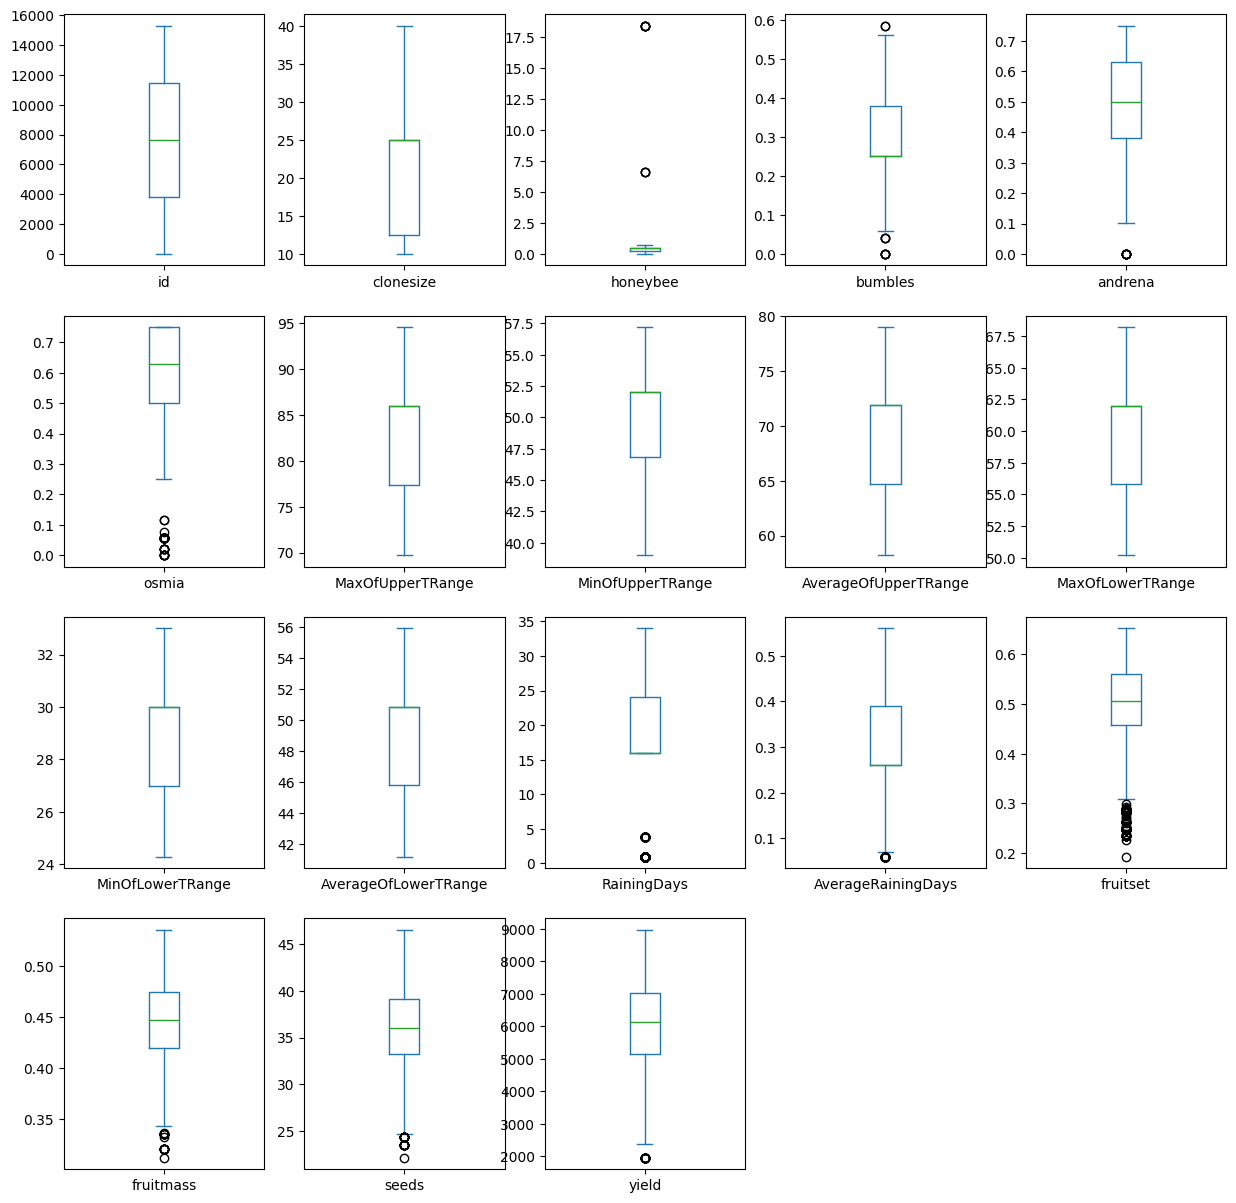

In [10]:
# box and whisker plots
df.plot(kind='box', figsize=(15,15), subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.show()

In [34]:
df['honeybee'].value_counts()

honeybee
0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: count, dtype: int64

<Axes: >

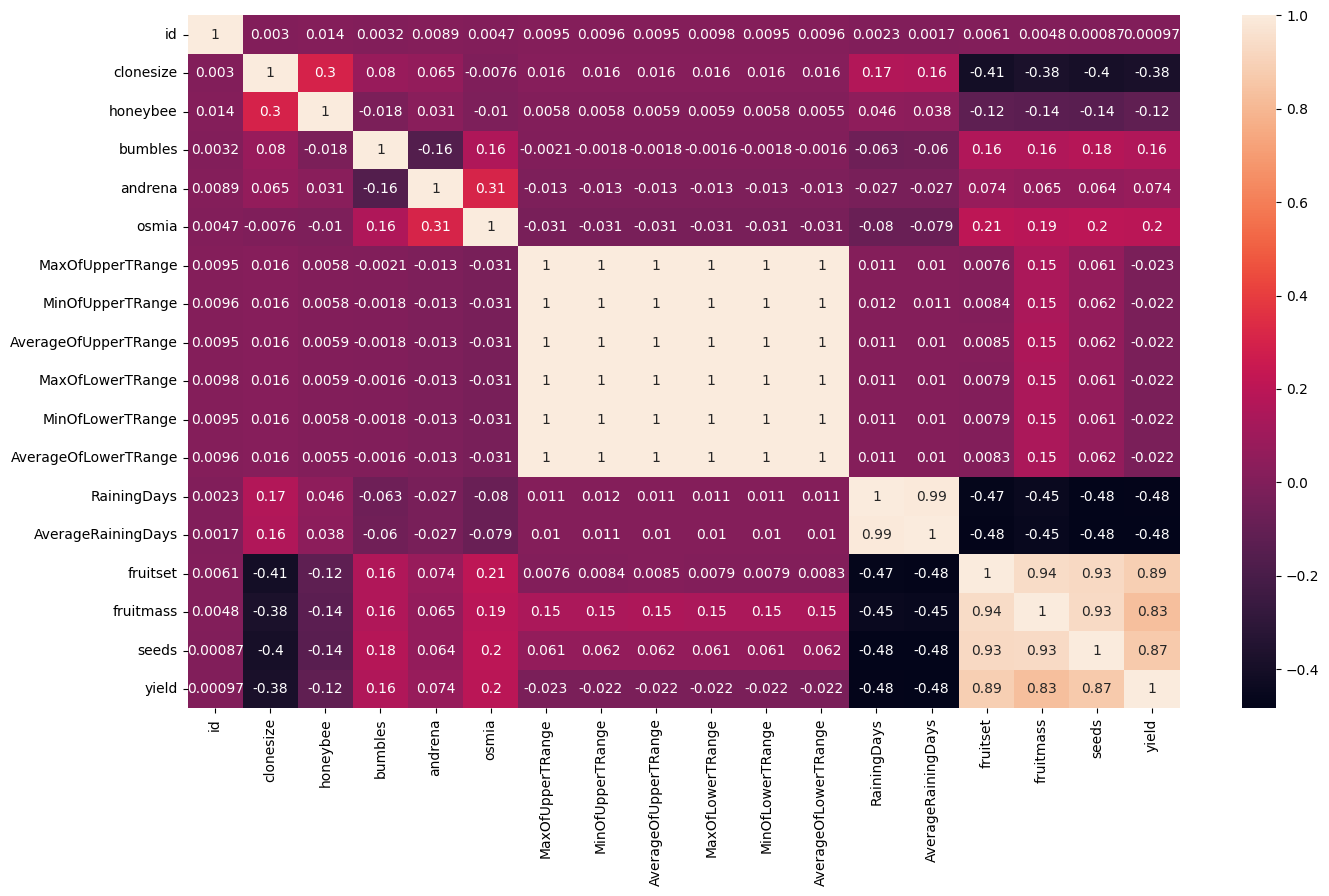

In [21]:
plt.rcParams["figure.figsize"] = [16,9]
sns.heatmap(df.corr(), annot=True)

SUMMARY:
- cols to drop or keep one of them:

MaxOfUpperTRange<br>
MinOfUpperTRange<br>
AverageOfUpperTRange<br>
MaxOfLowerTRange<br>
MinOfLowerTRange<br>
AverageOfLowerTRange<br>

- keep one col of fruitset, fruitmass, seeds. Rest drop 
- keep one col of RainingDays, AvarageRainingDays. Rest drop 
- CloneSize to drop?

In [104]:
col_drop = [
'MaxOfUpperTRange',
'MinOfUpperTRange',
'AverageOfUpperTRange',
'MaxOfLowerTRange',
'MinOfLowerTRange',
'AverageOfLowerTRange'
]

df.drop(col_drop, axis=1)

,id,clonesize,honeybee,bumbles,andrena,osmia,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


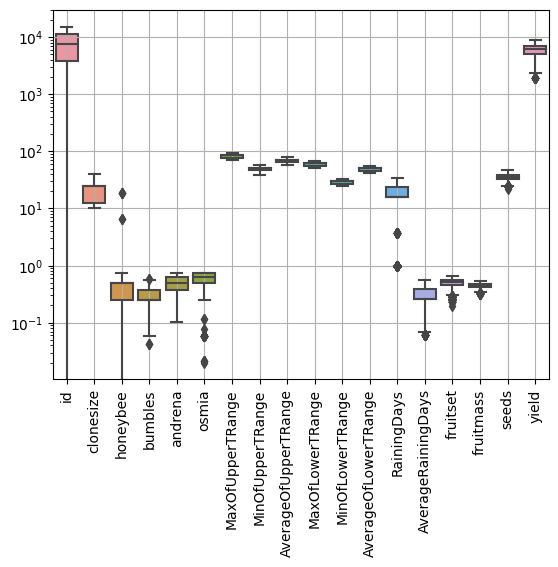

In [27]:
ax = sns.boxplot(data=df, orient="v", showfliers=True)
# ax.set_ylim()
ax.set_yscale("log")
plt.xticks(rotation = 90)
plt.grid(visible=True, which='major', axis='both')

## Pandas profiling

In [14]:
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file=f'ProfileReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# # correlation
# set_option('display.precision', 3)
# print(df.corr(method='pearson'))

## Data preprocessing